<a href="https://colab.research.google.com/github/ericchu2595/911_EmergencyCall_Study/blob/main/911EmergencyCalls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study

Congrats! You have been contracted to conduct a brief analysis of a dataset containing ememrgency calls in order to determine the allocation of funds to you local authorities.  This analysis will play a role in deciding changes to the emergency response department.

The data is based in 911 emergency calls and your job is to determine a variety of issues regarding said calls.

1. Using Pandas and Numpy, analyse the data and come up with 5 questions that you would like to answer about the data.

2. The instructor will provide a range of questions to answer, and you should use your knowledge to complete them as a team.

# In collaboration with Nicholas, Shariq, and Ace

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
sns.set()

In [5]:
# Enter the Google Drive directory/url for 911.csv in the quotes
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/911/Data/911.csv')

# Uncomment this line to use the Excel file on GitHub
# data = pd.read_csv('https://github.com/ericchu2595/911_EmergencyCall_Study/blob/main/911.csv')

In [6]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
data.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1


In [8]:
data.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


# Instructor's Questions

## Question 1

What are the top 5 zip codes for 911 calls?

In [9]:
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

## Question 2

What are the top 5 townships for 911 calls?

In [10]:
data['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

## Question 3



In [11]:
data['title'].nunique()

110

In [12]:
data['title'].value_counts()

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
                               ...  
Fire: DIABETIC EMERGENCY           1
Fire: UNCONSCIOUS SUBJECT          1
EMS: PLANE CRASH                   1
EMS: DISABLED VEHICLE              1
EMS: BOMB DEVICE FOUND             1
Name: title, Length: 110, dtype: int64

### Creating a new column for call reasons

In [13]:
# Creates a new column of reasons for the 911 calls

data['Reason'] = data['title'].apply(lambda title: title.split(':')[0])

In [14]:
# Prints the values for each uninque reason

data['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

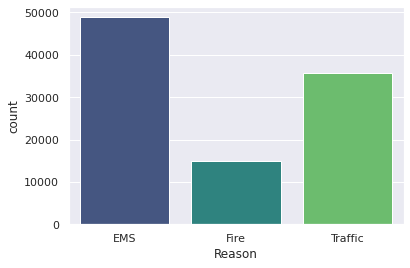

In [15]:
# Plotting the counts for each reason using seaborn

sns.countplot(x='Reason', data=data, palette='viridis')

## Question 4

What's the most common call reason on each day of the week and month of the year?

### Focusing on time information

In [16]:
# Shows that the type of all elements in the timeStamp column are strings

type(data['timeStamp'].iloc[0])

str

In [17]:
# Converts the strings in the timeStamp column to datetime objects

data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [18]:
time = data['timeStamp'].iloc[0]

In [19]:
# Creating 3 new columns based on the new datetime objects created

data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['Day'] = data['timeStamp'].apply(lambda time: time.dayofweek)
data['Month'] = data['timeStamp'].apply(lambda time: time.month)
data['Year'] = data['timeStamp'].apply(lambda time: time.year)

In [20]:
data.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Month,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3,12,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3,12,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,3,12,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,3,12,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,3,12,2015
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,3,12,2015
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,17,3,12,2015
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,17,3,12,2015
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,17,3,12,2015
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,3,12,2015


In [21]:
# Creating a map of days of the week

day_map = {0: 'Mon',
           1: 'Tues',
           2: 'Wed',
           3: 'Thurs',
           4: 'Fri',
           5: 'Sat',
           6: 'Sun',}

In [22]:
# Mapping the days to the int values in the 

data['Day'] = data['Day'].map(day_map)

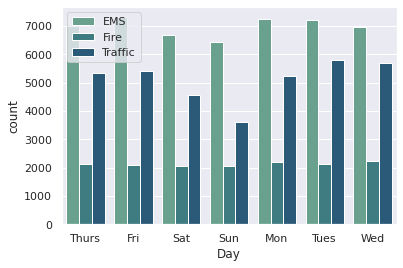

In [23]:
# Plotting the reasons for calls by day

sns.countplot(x='Day', data=data, hue='Reason', palette='crest')
plt.legend(loc='best')

In [24]:
byMonth = data.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Year
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


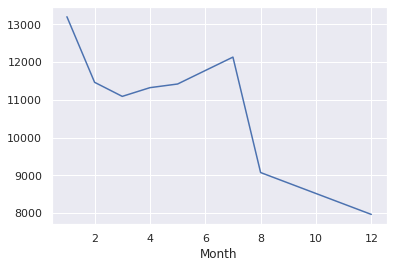

In [25]:
# Plot of count of calls for each month using the townships

byMonth['twp'].plot()

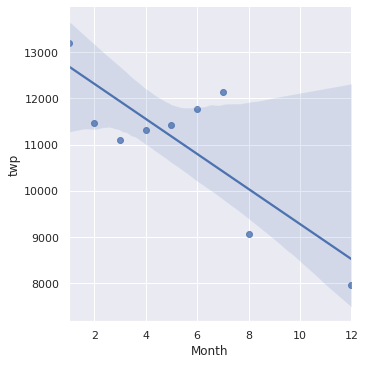

In [26]:
# seaborn limit plot

sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

In [27]:
data['Date'] = data['timeStamp'].apply(lambda t: t.date())

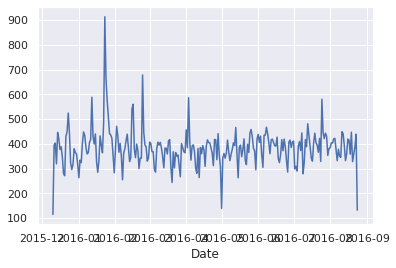

In [28]:
data.groupby('Date').count()['twp'].plot()

# Self-Created Questions

1. What are the 10 most common titles for 911 emergency calls?
1. How many emergency calls did each zip code make?
1. What township(s) made the least 911 emergency calls?
1. How many addresses have "dead end" in them?
1. How many 911 emergency calls were recorded in each year?
1. Which four-hour intervals of the day are the most active for calls?

## Question 1

What are the 10 most common titles for 911 emergency calls?

In [29]:
# Shows the first 10 rows by title
data['title'].value_counts().head(10)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64

### Answer 1

In [30]:
# Converts the titles and their counts into a dictionary
titles = data['title'].value_counts()[:10].to_dict()

print('The 10 most common titles are:\n')
print('                Title           |   Count')
print('------------------------------------------------')

# Iterates over the dictionary we created to print out the values in a table
for key,value in titles.items():
  print(" % 30s" % key + '\t|',
        " % 5d" % value)

The 10 most common titles are:

                Title           |   Count
------------------------------------------------
    Traffic: VEHICLE ACCIDENT -	|   23066
    Traffic: DISABLED VEHICLE -	|   7702
               Fire: FIRE ALARM	|   5496
     EMS: RESPIRATORY EMERGENCY	|   5112
         EMS: CARDIAC EMERGENCY	|   5012
               EMS: FALL VICTIM	|   4863
          EMS: VEHICLE ACCIDENT	|   3935
    Traffic: ROAD OBSTRUCTION -	|   3144
           EMS: SUBJECT IN PAIN	|   2687
               EMS: HEAD INJURY	|   2631


## Question 2

How many emergency calls did each zip code make?

### Answer 2

In [31]:
# df['zip'].dropna().unique() would remove the NaN zip codes if using the unique method

# Since each row is an instance of an emergency call, we merely need to count the number
# of occurrences of each zip code. We then turn the series to a dictionary.
zip_code_calls = data['zip'].value_counts().to_dict()

print('The following table shows how many calls each zip code made between Dec. 2015 and Aug. 2016.\n')
print(' Zip Code          Calls')

# Iterates over the dictionary we created to print out the values in a table
for key,value in zip_code_calls.items():
  print(' % 5d' % key + '\t\t',
        ' % 4d' % value)

The following table shows how many calls each zip code made between Dec. 2015 and Aug. 2016.

 Zip Code          Calls
  19401		   6979
  19464		   6643
  19403		   4854
  19446		   4748
  19406		   3174
  19002		   3050
  19468		   2990
  19454		   2781
  19090		   2635
  19038		   2578
  19046		   2564
  19426		   2461
  19428		   2296
  19006		   2256
  19462		   2078
  19040		   2043
  19438		   1990
  19422		   1963
  19027		   1818
  19044		   1595
  19001		   1514
  19010		   1316
  18964		   1287
  19004		   1280
  19440		   1190
  19096		   1115
  19003		   1094
  19095		   1023
  19473		   1012
  19444		   1008
  19525		   965
  19034		   796
  18073		   736
  19072		   728
  18969		   672
  19012		   593
  19031		   566
  19025		   493
  19035		   481
  19465		   458
  19066		   451
  19041		   436
  18074		   435
  19405		   428
  19460		   427
  18041		   414
  19087		   344
  18054		   326
  18076		   306
  19085		   304
  19075		   302
  19150		   288
  19151		   287
  1

### Graph 2.1 - Count Plot of Zip Codes and Call Count

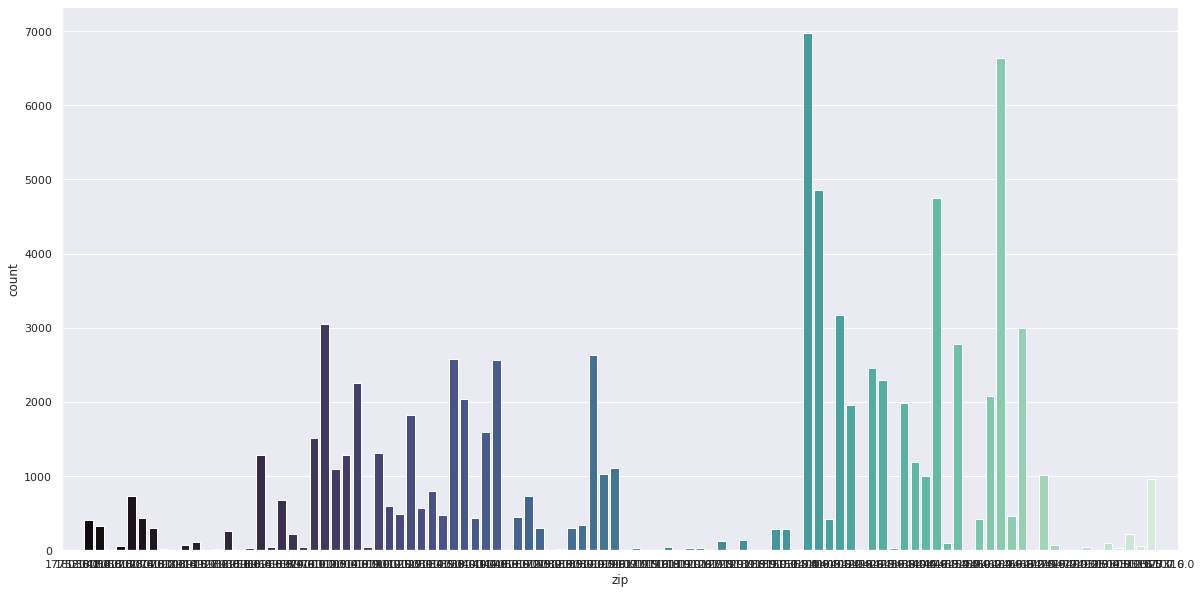

In [32]:
# A count plot of all zip codes and their count of calls

plt.figure(figsize=(20,10))
sns.countplot(x='zip', data=data, palette='mako')

Given the limitations on the size of the graph, this count plot gives a general idea of the number of calls made as zip codes increase. However, a heat map will be more descriptive in showing the number of calls per day of the week made by each zip code.

### Graph 2.2 - Heat Map of Call Count by Day and Zip Code

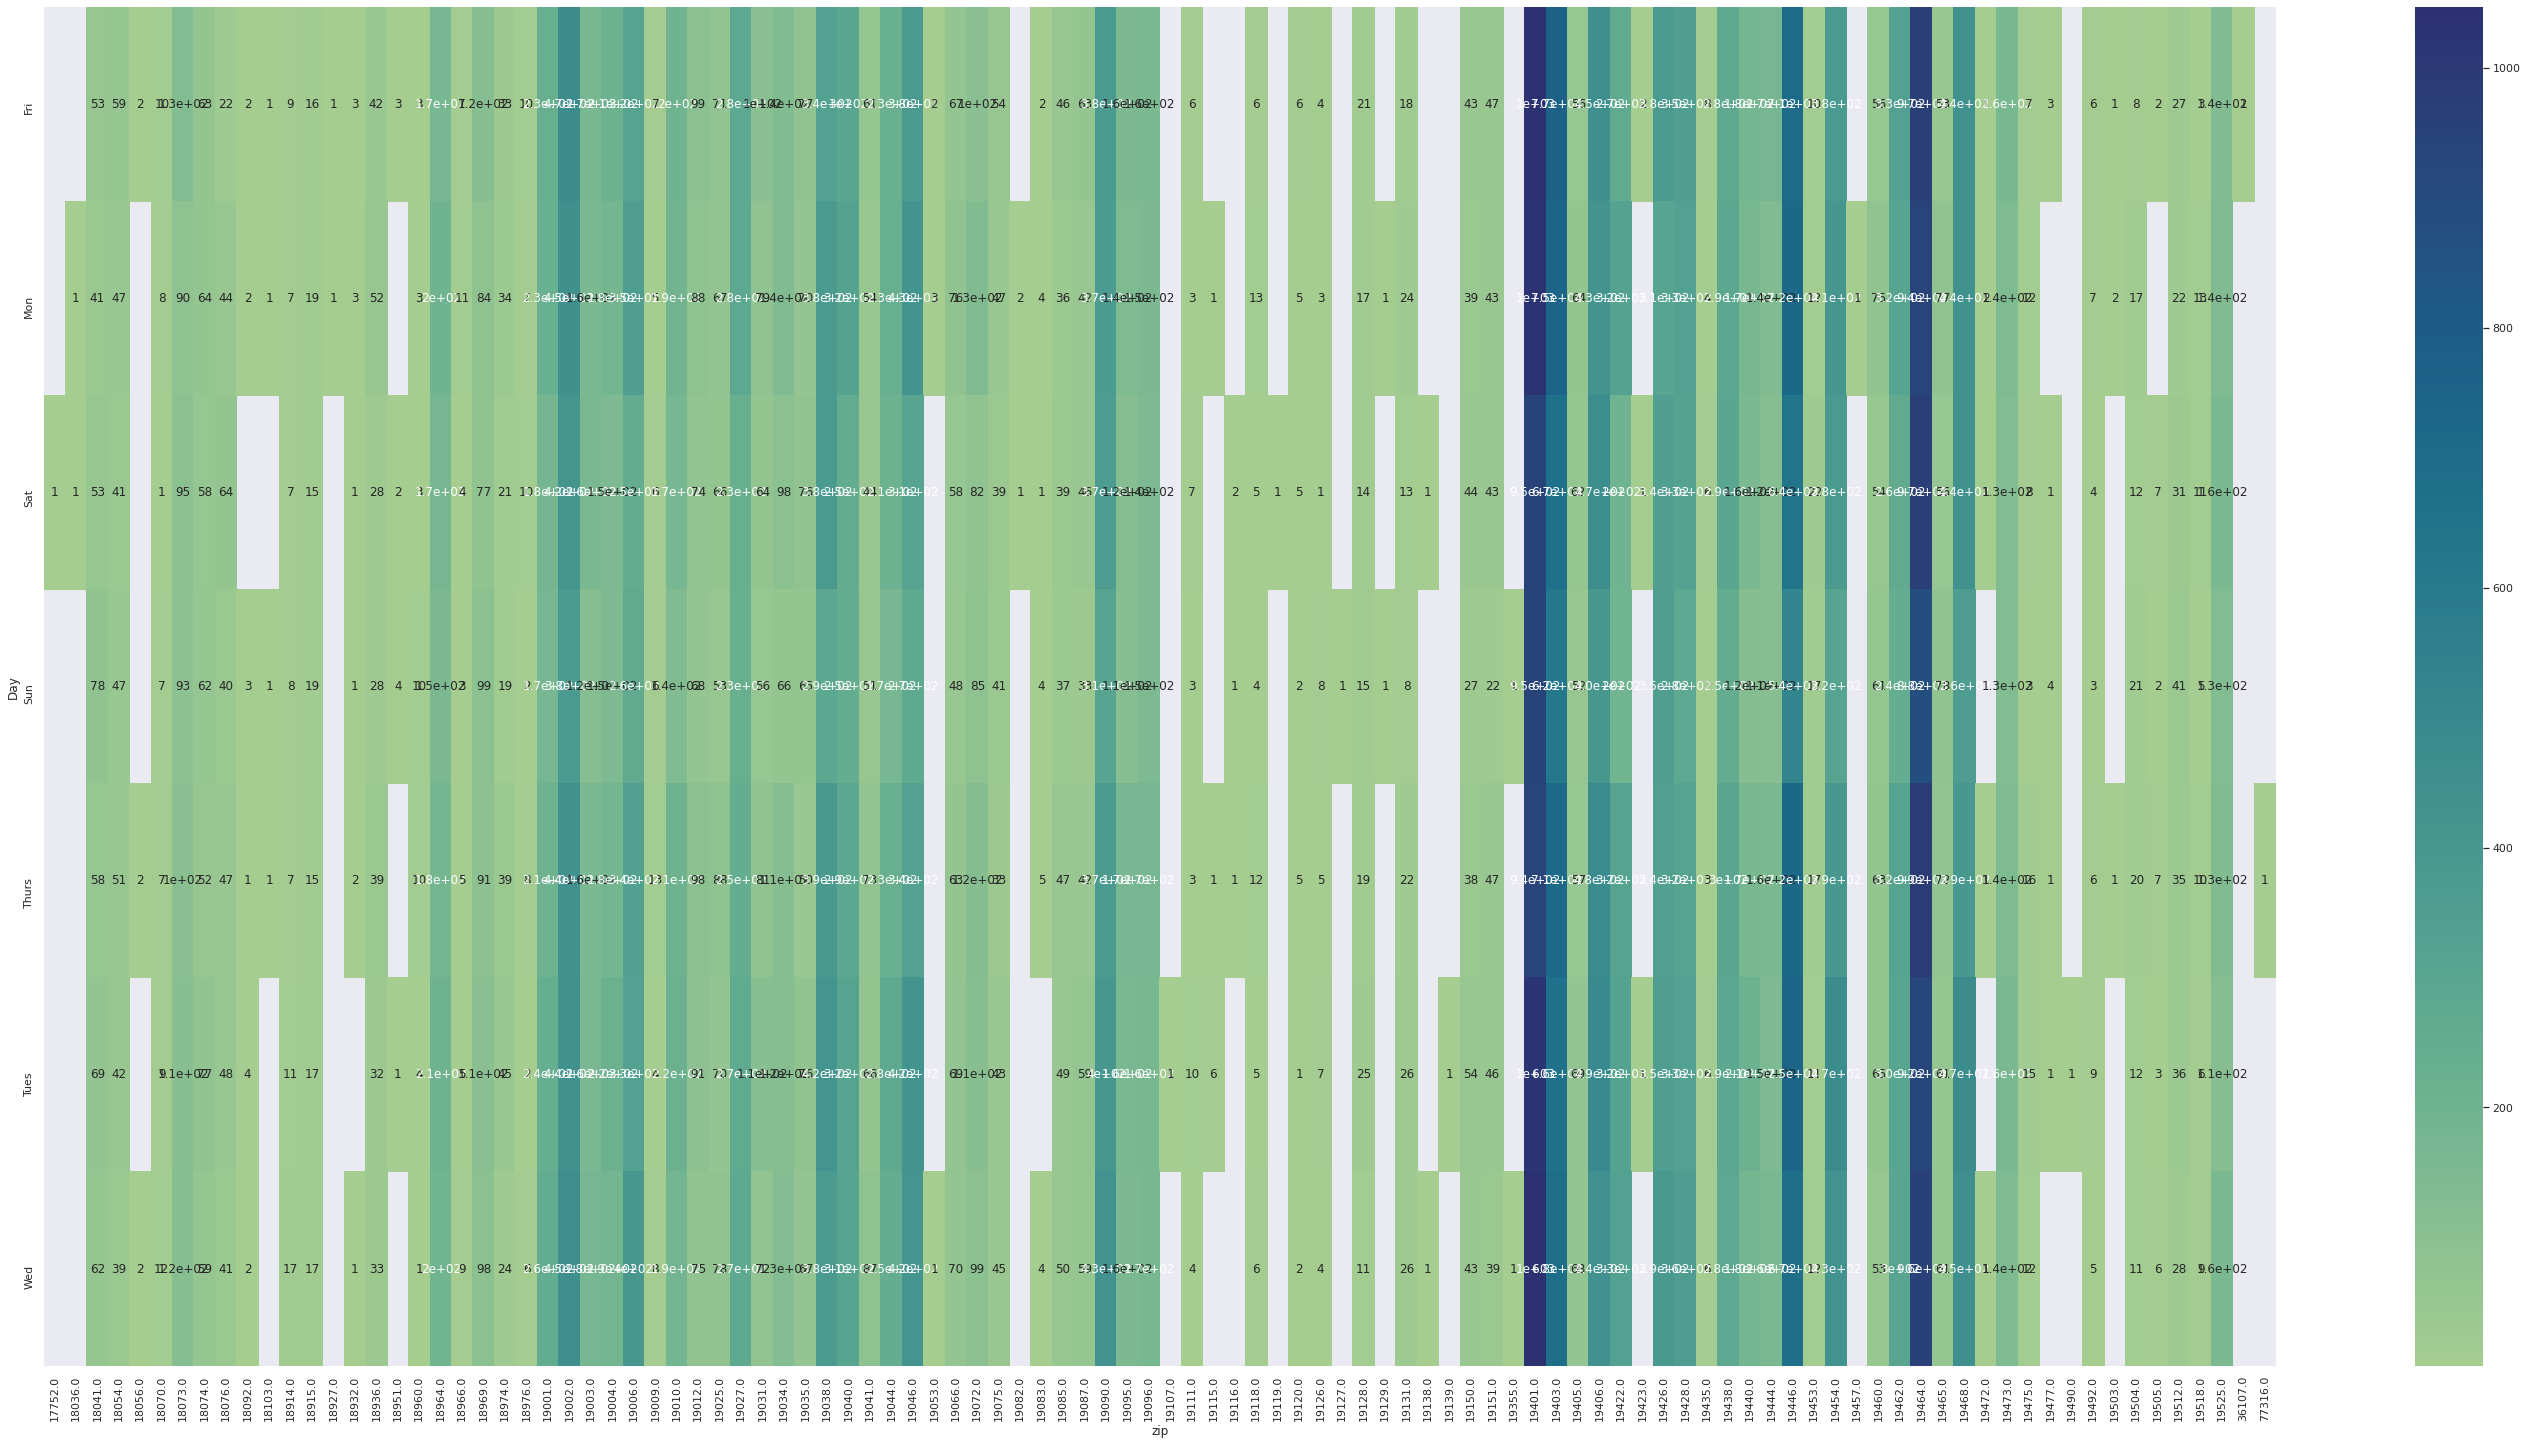

In [33]:
# A heat map of call count by zip code and day

zips = data.groupby(by=['Day','zip']).count()['Reason'].unstack()
plt.figure(figsize=(50,25))
sns.heatmap(zips, cmap='crest', annot=True)

- As shown by the heat map, zip code 77316 only made one emergency call on a Thursday between December 2015 and August 2016
- Similarly, zip code 17752 only made one emergency call on a Saturday and zip code 19457 made one emergency call on a Monday between December 2015 and August 2016.

- On the other hand, based on the colors of the heat map, we can see that 19401 and 19464 made the most calls between December 2015 and August 2016.

### Graph 2.3 - Top 50 Zip Codes Based on Call Count

In [34]:
# Saving the top 50 zip codes based on call count
zip_code_calls = data['zip'].value_counts()
zip_code_calls = zip_code_calls.head(50)

zip_code_calls

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
19046.0    2564
19426.0    2461
19428.0    2296
19006.0    2256
19462.0    2078
19040.0    2043
19438.0    1990
19422.0    1963
19027.0    1818
19044.0    1595
19001.0    1514
19010.0    1316
18964.0    1287
19004.0    1280
19440.0    1190
19096.0    1115
19003.0    1094
19095.0    1023
19473.0    1012
19444.0    1008
19525.0     965
19034.0     796
18073.0     736
19072.0     728
18969.0     672
19012.0     593
19031.0     566
19025.0     493
19035.0     481
19465.0     458
19066.0     451
19041.0     436
18074.0     435
19405.0     428
19460.0     427
18041.0     414
19087.0     344
18054.0     326
18076.0     306
19085.0     304
Name: zip, dtype: int64

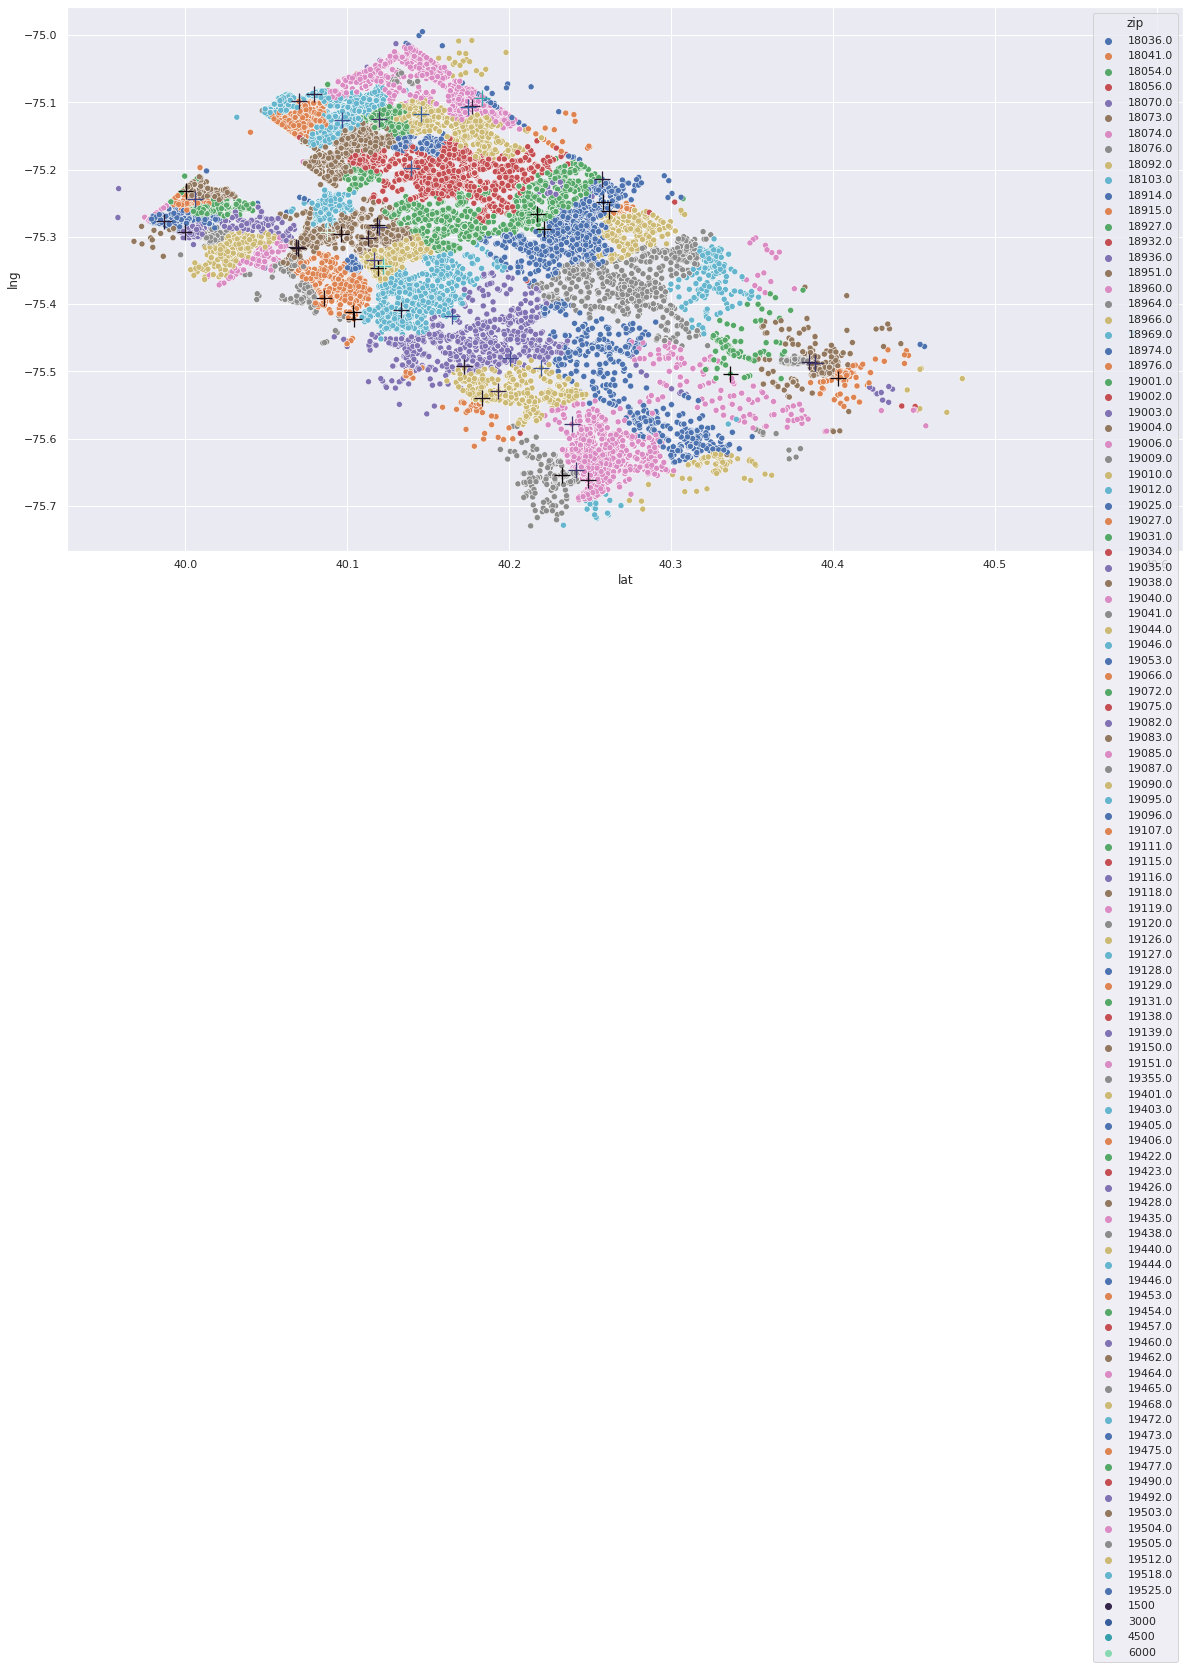

In [35]:
data=data[data['lat']>38.58]
data=data[data['lng']>-75.8]
plt.figure(figsize=(20,10))

# First plot for calls based on coordinates
sns.scatterplot(x=data['lat'], y=data['lng'], hue=data['zip'], data=data, palette="deep")

# Second plot displaying the top 50 zip codes based on call count
sns.scatterplot(x=data['lat'], y=data['lng'], hue=zip_code_calls, data=data, s=250, color=".2", marker="+", palette="mako")

Graph 2.3 shows a scatter plot of the calls made according to the geographical coordinates overlayed with a scatter plot of the top 50 zip codes which made calls (denoted by '+').

## Question 3

What township(s) made the least 911 emergency calls?

In [36]:
data['twp'].value_counts().tail(1)

LEHIGH COUNTY    30
Name: twp, dtype: int64

### Answer 3

This call to the last item in the table shows us that Lehigh County made the least amount of calls during the time frame (30 calls).

### Graph 3.1 - Count Plot of Calls by Township

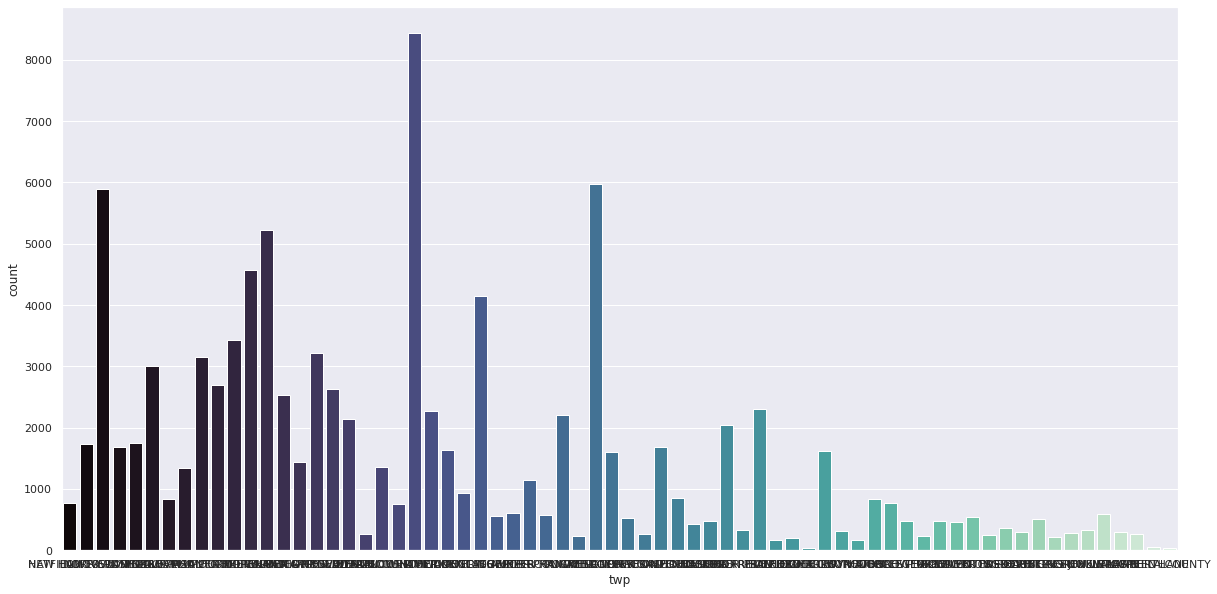

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x='twp', data=data, palette='mako')

This count plot shows the count for each township. Since the size of the graph is limited and the township names are long, the x-axis label is illegible.

## Question 4

How many addresses have "dead end" in them?

### Answer 4

In [38]:
# Counts the number of rows with 'DEAD END' in the addr column
# The na=False argument tells the contains method to not fill missing values
dead_ends = data[data['addr'].str.contains('DEAD END', na=False)]['addr'].count()

print('There are', dead_ends, 'addresses with "DEAD END" in them.')

There are 1390 addresses with "DEAD END" in them.


## Question 5

How many 911 emergency calls were recorded in each year?

In [39]:
data['Year'].value_counts()

2016    91509
2015     7968
Name: Year, dtype: int64

### Answer 5

According to the call to the value_counts() method, there were 7968 calls recorded in 2015 and 91509 recording in 2016.

### Graph 5.1 - Count Plot of Recorded Calls by Year

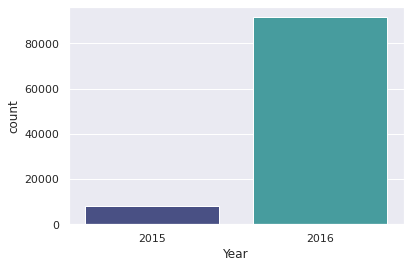

In [40]:
sns.countplot(x='Year', data=data, palette='mako')

## Question 6

Which four-hour intervals of the day are the most active for calls?

In [41]:
# Converts the timeStamp column from a string to datetime object
data['timeStamp']=pd.to_datetime(data['timeStamp'])

# Adding 3 columns for hour, month, and day
data['Hour']=data['timeStamp'].apply(lambda time: time.hour)
data['Month']=data['timeStamp'].apply(lambda time: time.month)
data['day']=data['timeStamp'].apply(lambda time: time.dayofweek)

# Creates cuts for the hours
data[['Hour']] = pd.cut(data['Hour'], 
                    bins=[0,4,8,12,16,20,24], 
                    include_lowest=True, 
                    labels=['12AM-4AM','4AM-8AM','8AM-12PM', '12PM-4PM', '4PM-8PM', '8PM-12AM'])

### Graph 6.1 - Count Plot of Call Counts by Four-Hour Intervals

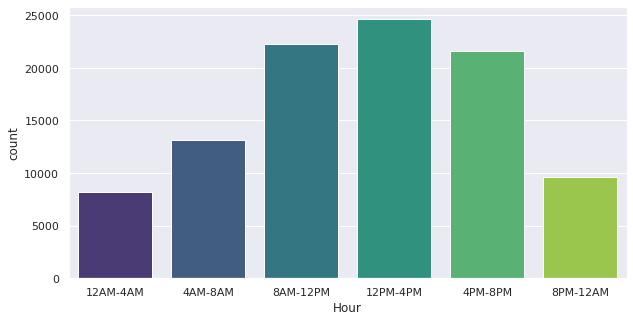

In [42]:
# Creates a countplot for the four-hour intervals and their call counts
plt.figure(figsize=(10,5))
sns.countplot(x="Hour", data=data,palette='viridis')

### Answer 6

The graph shows that 12pm-4pm is the most active four-hour interval for 911 emergency calls.